<a href="https://colab.research.google.com/github/bthodla/danano/blob/master/prj4/act_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data that we put together in the "wrangle_act.ipynb" notebook provides some interesting possibilities for insights. For example:

1. Top 10 tweets by Retweet counts (Bar Chart)
2. Highest rated dogs by rating_numerator (Bar Chart)
3. Relationship between Rating and Retweet counts (Scatter Plot)
4. Retweets by dog stages (Histogram)
5. Most popular breeds by Tweet counts (Bar Chart)
6. Most popular breeds by Retweet counts (Bar Chart)
7 Tweet count time graph by month (Trend Line)

In the following sections, I am going to provide this information both as a table and as a chart of some kind.

In [0]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
% matplotlib inline


# To supporess high integer values from being returned in exponential format
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# First, let us load the data that we saved into files earlier into dataframes
drive.mount('/content/gdrive')
twitter_archive_master_file = '/content/gdrive/My Drive/Colab Notebooks/twitter_archive_master.csv'
dog_stage_file = '/content/gdrive/My Drive/Colab Notebooks/dog_stage.csv'

twitter_archive_master_df = pd.read_csv(twitter_archive_master_file)
dog_stage_df = pd.read_csv(dog_stage_file)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 13 columns):
Unnamed: 0               1989 non-null int64
tweet_id                 1989 non-null int64
timestamp                1989 non-null object
source                   1989 non-null object
text                     1989 non-null object
rating_numerator         1989 non-null int64
rating_denominator       1989 non-null int64
name                     1989 non-null object
breed                    1682 non-null object
prediction_confidence    1682 non-null float64
retweet_count            1989 non-null int64
favorite_count           1989 non-null int64
media_url                1746 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 202.1+ KB


In [14]:
dog_stage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
Unnamed: 0    356 non-null int64
tweet_id      356 non-null int64
dog_stage     356 non-null object
dtypes: int64(2), object(1)
memory usage: 8.4+ KB


In [51]:
# 1. Top 10 tweets by Retweet counts
top10_tweets_by_retweets = twitter_archive_master_df[['tweet_id', 'text', 'name', 'breed', 'retweet_count']].sort_values(by = 'retweet_count', ascending = False).head(10)

top10_tweets_by_retweets


,tweet_id,text,name,breed,retweet_count
771,744234799360020481,Here's a doggo realizing you can stand in a po...,None,Labrador_retriever,82878
806,739238157791694849,Here's a doggo blowing bubbles. It's downright...,None,Eskimo_dog,61372
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,Chihuahua,60425
306,822872901745569793,Here's a super supportive puppo participating ...,None,Lakeland_terrier,47238
56,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,English_springer,43025
330,819004803107983360,This is Bo. He was a very good First Doggo. 14...,Bo,standard_poodle,39746
399,806629075125202948,"""Good afternoon class today we're going to lea...",None,cocker_spaniel,37837
105,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,French_bulldog,35125
1419,678399652199309312,This made my day. 12/10 please enjoy https://t...,None,Bedlington_terrier,33456
1477,676219687039057920,This is Kenneth. He's stuck in a bubble. 10/10...,Kenneth,whippet,32404


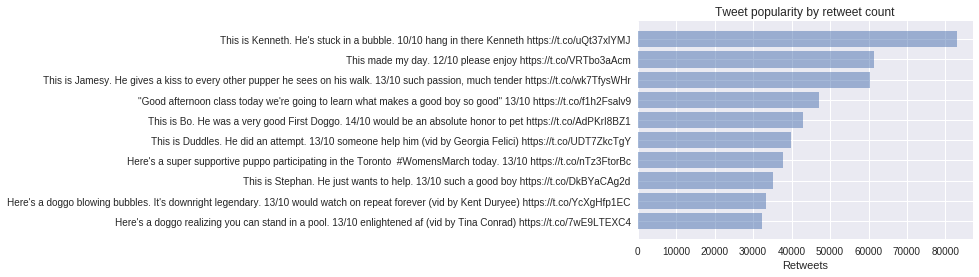

In [34]:
x_axis = top10_tweets_by_retweets['text']
y_pos = np.arange(len(x_axis))
performance = top10_tweets_by_retweets['retweet_count'].sort_values()
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, x_axis)
plt.xlabel('Retweets')
plt.title('Tweet popularity by retweet count')
 
plt.show()

In [49]:
# 2. Highest rated dogs by rating_numerator
hr_dogs_df = twitter_archive_master_df[['tweet_id', 'text', 'rating_numerator', 'breed']].sort_values(by = 'rating_numerator', ascending = False).head(10)
hr_dogs_df

,tweet_id,text,rating_numerator,breed
722,749981277374128128,This is Atticus. He's quite simply America af....,1776,NaN
1713,670842764863651840,After so many requests... here you go.\n\nGood...,420,NaN
844,731156023742988288,Say hello to this unbelievably well behaved sq...,204,NaN
659,758467244762497024,Why does this never happen at my front door......,165,Labrador_retriever
1430,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,chow
1298,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,golden_retriever
1299,684222868335505415,Someone help the girl is being mugged. Several...,121,soft-coated_wheaten_terrier
942,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,golden_retriever
1489,675853064436391936,Here we have an entire platoon of puppers. Tot...,88,Labrador_retriever
320,820690176645140481,The floofs have been released I repeat the flo...,84,West_Highland_white_terrier


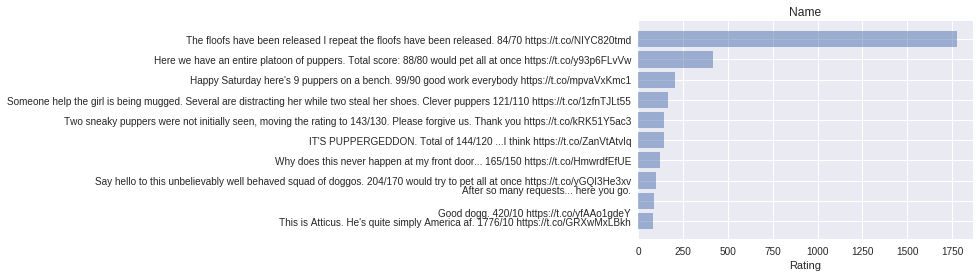

In [50]:
x_axis = hr_dogs_df['text']
y_pos = np.arange(len(x_axis))
performance = hr_dogs_df['rating_numerator'].sort_values()
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, x_axis)
plt.xlabel('Rating')
plt.title('Name')
 
plt.show()

In [63]:
# 3. Relationship between Rating and Retweet counts for the top 100 ratings

rating_retweet_df = twitter_archive_master_df[['tweet_id', 'text', 'rating_numerator', 'retweet_count']].sort_values(by = 'rating_numerator', ascending = False).head(100)
rating_retweet_df.head(10)

,tweet_id,text,rating_numerator,retweet_count
722,749981277374128128,This is Atticus. He's quite simply America af....,1776,2610
1713,670842764863651840,After so many requests... here you go.\n\nGood...,420,8879
844,731156023742988288,Say hello to this unbelievably well behaved sq...,204,1342
659,758467244762497024,Why does this never happen at my front door......,165,2377
1430,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,1015
1298,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,226
1299,684222868335505415,Someone help the girl is being mugged. Several...,121,1457
942,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,775
1489,675853064436391936,Here we have an entire platoon of puppers. Tot...,88,1351
320,820690176645140481,The floofs have been released I repeat the flo...,84,3475


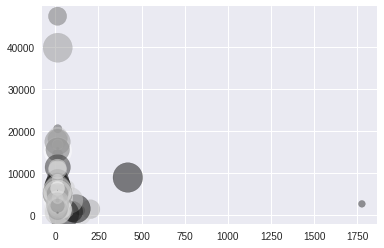

In [74]:
# Fixing random state for reproducibility
np.random.seed(97)

rcount = 100
x = rating_retweet_df['rating_numerator']
y = rating_retweet_df['retweet_count']
colors = np.random.rand(rcount)
area = (30 * np.random.rand(rcount))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

The above scatter plot proves that higher rating doesn't usually imply higher retweet counts.

In [116]:
# 4. Tweets by dog stages

dog_stage_tweets_df = twitter_archive_master_df['tweet_id'].to_frame().merge(dog_stage_df, on = 'tweet_id', how = 'inner')

dog_stage_tweets_df.head()

,tweet_id,Unnamed: 0,dog_stage
0,890240255349198849,7,doggo
1,889665388333682689,6529,puppo
2,889531135344209921,6531,puppo
3,886366144734445568,4372,pupper
4,884162670584377345,38,doggo


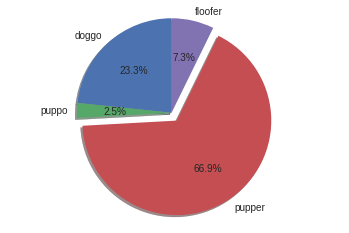

In [126]:
labels = dog_stage_tweets_df['dog_stage'].unique()
sizes = dog_stage_tweets_df.groupby('dog_stage').count()['tweet_id']
explode = (0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()